# 队列简介

> 队列（Queue）：一种线性表数据结构，是一种只允许在表的一端进行插入操作，而在表的另一端进行删除操作的线性表。

我们把队列中允许插入的一端称为 「队尾（rear）」；把允许删除的另一端称为 「队头（front）」。当表中没有任何数据元素时，称之为 「空队」。

队列有两种基本操作：「插入操作」 和 「删除操作」。
- 队列的插入操作又称为「入队」。
- 队列的删除操作又称为「出队」。

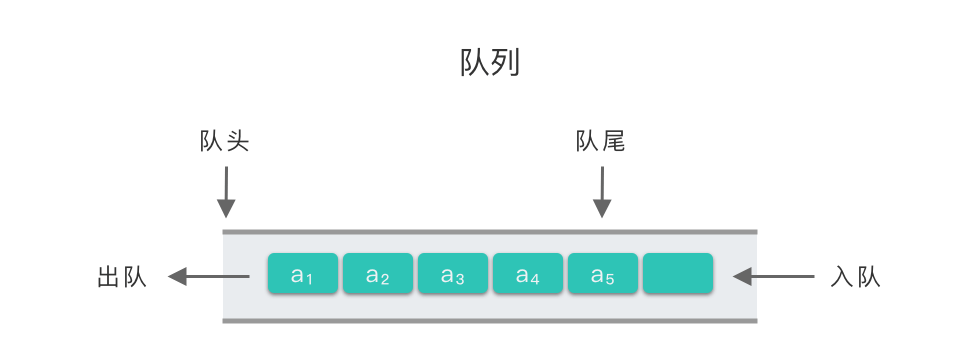

简单来说，队列是一种 「先进先出（First In First Out）」 的线性表，简称为 「FIFO 结构」。

# 2. 队列的顺序存储与链式存储

和线性表类似，队列有两种存储表示方法：「顺序存储的队列」 和 「链式存储的队列」。

- 「顺序存储的队列」：利用一组地址连续的存储单元依次存放队列中从队头到队尾的元素，同时使用指针$front$指向队头元素在队列中的位置，使用指针$rear$指示队尾元素在队列中的位置。
- 「链式存储的队列」：利用单链表的方式来实现队列。队列中元素按照插入顺序依次插入到链表的第一个节点之后，并使用队头指针$front$指向链表头节点位置，也就是队头元素，$rear$指向链表尾部位置，也就是队尾元素。

## 2.1 队列的基本操作

- **初始化空队列**：创建一个空队列，定义队列大小$size$，队头指针$front$，队尾指针$rear$。
- **判断队列是否为空**：队列为空，返回$True$。队列不空，返回$False$。**一般只用于「出队操作」和「获取队头元素操作」中**。
- **判断队列是否已满**：队列已满，返回$True$。队列未满，返回$False$。**一般只用于顺序队列中插入元素的操作**。
- **入队**：在队尾后插入一个新元素，并改变队尾指针$rear$的指向位置。
- **出队**：删除队头元素，并改变队头指针$front$的指向位置。
- **获取对头元素**：不改变队头指针。
- **获取队尾元素**：不改变队尾指针。

## 2.2 队列的顺序存储实现

### 2.2.1 队列的顺序存储基本描述

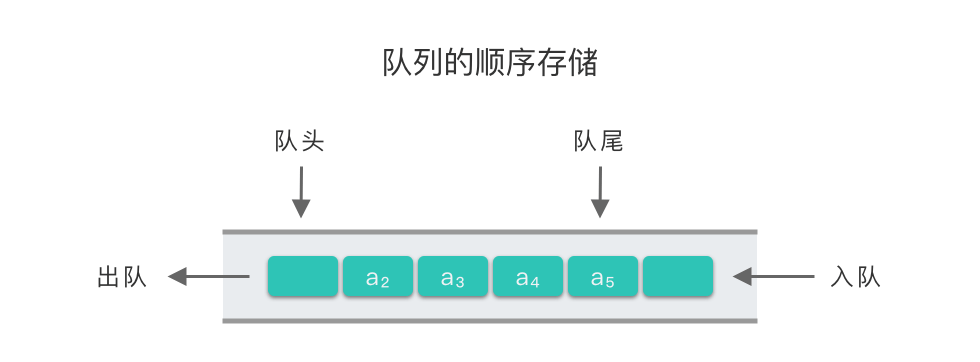

为了算法设计上的方便以及算法本身的简单，我们约定：队头指针$self.front$指向队头元素所在位置的前一个位置，而队尾指针$self.rear$指向队尾元素所在位置。
- **初始化空队列**：创建一个空队列$self.queue$，定义队列大小$self.size$，令队头指针$front$和队尾指针$rear$指向-1即$self.front=self.rear=-1$。
- **判断队列是否为空**：根据$self.front$和$self.rear$的指向位置关系进行判断。如果$self.front==self.rear$，则说明队列为空。
- **判断队列是否已满**：如果队尾指针指向队列最后一个元素即$self.rear==self.size-1$，则说明队列已满。
- **入队**：先判断队列是否已满，已满直接抛出异常。如果队列不满，则将队尾指针$self.rear$右移一位，并进行赋值操作。
- **出队**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，则将队头指针$self.front$指向元素赋值为$None$并将队头指针$self.front$右移一位。
- **获取对头元素**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，因为$self.front$指向队头元素所在位置的前一个位置，所以队头元素在$self.front$后面一个位置上，故返回$self.queue[self.front+1]$。
- **获取队尾元素**：先判断队列是否为空，为空直接抛出异常。如果不为空，返回$self.queue[self.rear]$。

### 2.2.2 队列的顺序存储实现代码

In [ ]:
class Queue:
    # 初始化空队列
    def __init__(self, size=100):
        self.size = size
        self.queue = [None for _ in range(size)]
        self.front = -1
        self.rear = -1
    
    # 判断队列是否为空
    def is_empty(self):
        return self.front == self.rear
    
    # 判断队列是否已满
    def is_full(self):
        return self.rear + 1 == self.size
    
    # 入队
    def enqueue(self, elem):
        if self.is_full():
            raise Exception("Queue is full")
        else:
            self.rear += 1
            self.queue[self.rear] = elem
            
    # 出队
    def dequeue(self):
        if self.is_empty():
            raise Exception("Queue is empty")
        else:
            self.queue[self.front] = None
            self.front += 1
            return self.queue[self.front]
    
    # 获得队头元素
    def get_head(self):
        if self.is_empty():
            raise Exception("Queue is empty")
        else:
            return self.queue[self.front + 1]
    
    # 获得队尾元素
    def get_tail(self):
        if self.is_empty():
            raise Exception("Queue is empty")
        else:
            return self.queue[self.rear]

## 2.3 循环队列的顺序存储实现

在「2.2 队列的顺序存储实现」中，如果队列中第$0$ ~ $size-1$位置均被队列元素占用时，此时队列已满（即$self.rear==self.size-1$），再进行入队操作就会抛出队列已满的异常。

而由于出队操作总是删除当前的队头元素，将$self.front$进行右移，而插入操作又总是在队尾进行。经过不断的出队、入队操作，队列的变化就像是使队列整体向右移动。

当队尾指针满足$self.rear==self.size-1$条件时，此时再进行入队操作就会抛出队列已满的异常。而之前因为出队操作而产生空余位置也没有利用上，这就造成了「假溢出」问题。

> 解决方法：将队列想象成为头尾相连的循环表，利用数学中的求模运算，使得空间得以重复利用

在进行插入操作时，如果队列的第$self.size-1$个位置被占用之后，只要队列前面还有可用空间，新的元素加入队列时就可以从第0个位置开始继续插入。

我们约定：$self.size$为循环队列的最大元素个数。队头指针$self.front$指向队头元素所在位置的前一个位置，而队尾指针$self.rear$指向队尾元素所在位置。则：
1. 插入元素（入队）时：队尾指针循环前进1个位置，即$self.rear = (self.rear+1) mod self.size$。
2. 删除元素（出队）时：队头指针循环前进1个位置，即$self.front = (self.front+1) mod self.size$。

> 注意：
> - 循环队列在一开始初始化，队列为空时，满足条件$self.front == self.rear$。
> - 而当充满队列后，仍满足条件$self.front == self.rear$。
> 
> 这种情况下就无法判断「队列为空」还是「队列为满」了。

为了区分循环队列中「队列为空」还是「队列已满」的情况，我们采用如下方法：
- 特意空出来一个位置用于区分队列已满还是队列为空。入队时少用一个队列单元，即约定以「队头指针在队尾指针的下一位置」作为队满的标志。
    - 队列已满条件为：队头指针在队尾指针的下一位置，即$(self.rear + 1) mod self.size == self.front$。
    - 队列为空条件为：队头指针等于队尾指针，即$self.front == self.rear$。

### 2.3.1 循环队列的顺序存储基本描述

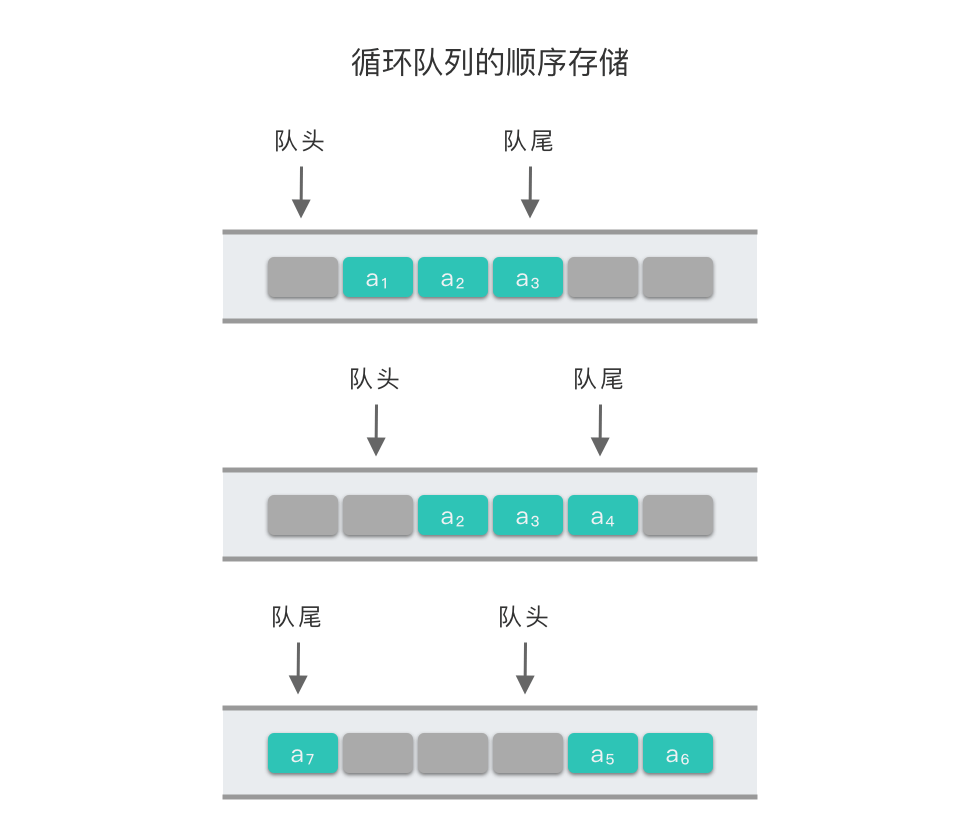

为了算法设计上的方便以及算法本身的简单，我们约定：队头指针$self.front$指向队头元素所在位置的前一个位置，而队尾指针$self.rear$指向队尾元素所在位置。
- **初始化空队列**：创建一个空队列$self.queue$，定义队列大小$self.size+1$，令队头指针$front$和队尾指针$rear$指向0。即$self.front=self.rear=0$。
- **判断队列是否为空**：根据$self.front$和$self.rear$的指向位置关系进行判断。如果$self.front==self.rear$，则说明队列为空。
- **判断队列是否已满**：队头指针在队尾指针的下一位置，即$(self.rear + 1) mod self.size == self.front$，则说明队列已满。否则，队列未满。
- **入队**：先判断队列是否已满，已满直接抛出异常。如果队列不满，则将队尾指针$self.rear$循环右移一位，并进行赋值操作。
- **出队**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，则将队头指针$self.front$指向元素赋值为$None$并将队头指针$self.front$右移一位。
- **获取对头元素**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，因为$self.front$指向队头元素所在位置的前一个位置，所以队头元素在$self.front$后面一个位置上，故返回$self.queue[self.front+1]$。
- **获取队尾元素**：先判断队列是否为空，为空直接抛出异常。如果不为空，返回$self.queue[self.rear]$。

In [ ]:
class Queue:
    # 初始化空队列
    def __init__(self, size=100):
        self.size = size
        self.queue = [None for _ in range(size)]
        self.front = -1
        self.rear = -1
        
    # 判断队列是否为空
    def is_empty(self):
        return self.front == self.rear
    
    # 判断队列是否已满
    def is_full(self):
        return self.rear + 1 == self.size
    
    # 入队操作
    def enqueue(self, value):
        if self.is_full():
            raise Exception('Queue is full')
        else:
            self.rear += 1
            self.queue[self.rear] = value
            
    # 出队操作
    def dequeue(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            self.queue[self.front] = None
            self.front += 1
            return self.queue[self.front]
        
    # 获取队头元素
    def get_head(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            return self.queue[self.front + 1]
    
    # 获取队尾元素
    def get_tail(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            return self.queue[self.rear]

## 2.3 队列的链式存储实现

### 2.3.1 队列的链式存储基本描述

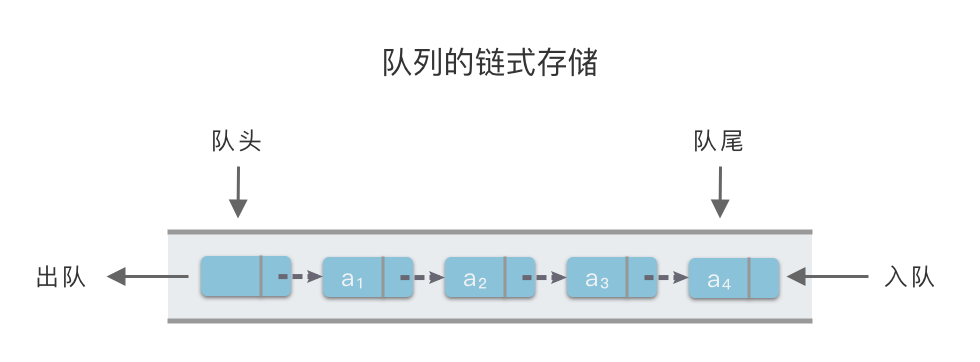

为了算法设计上的方便以及算法本身的简单，我们约定：队头指针$self.front$指向队头元素所在位置的前一个位置，而队尾指针$self.rear$指向队尾元素所在位置。
- **初始化空队列**：创建一个链表头节点$self.head$，令队头指针$self.front$和队尾指针$self.rear$指向$head$。即$self.front=self.rear=self.head$。
- **判断队列是否为空**：根据$self.front$和$self.rear$的指向位置关系进行判断。如果$self.front==self.rear$，则说明队列为空。
- **入队**：创建值为$value$的链表节点，插入到链表末尾，并令队尾指针$self.rear$沿链表移动1位到链表末尾。
- **出队**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，则获取队头指针$self.front$下一个位置节点上的值，并将$self.front$沿着链表移动1位。如果$self.front$下一个位置是$self.rear$，则说明队列为空，此时，将$self.rear$赋值为$self.front$，令其相等。
- **获取对头元素**：先判断队列是否为空，为空直接抛出异常。如果队列不为空，因为$self.front$指向队头元素所在位置的前一个位置，所以队头元素在$self.front$后面一个位置上，故返回$self.front.next.value$。
- **获取队尾元素**：先判断队列是否为空，为空直接抛出异常。如果不为空，返回$self.rear.value$。

### 2.3.2 队伍的链式存储实现代码

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
        
class Queue:
    # 初始化空队列
    def __init__(self):
        head = Node(0)
        self.front = head
        self.rear = head
    
    # 判断队列是否为空
    def is_empty(self):
        return self.front == self.rear
    
    # 入队操作
    def enqueue(self, value):
        node = Node(value)
        self.rear.next = node
        self.rear = node
    
    # 出队操作
    def dequeue(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            node = self.front.next
            self.front.next = node.next
            if self.rear == node:
                self.rear = self.front
            value = node.value
            del node
            return value
            
    # 获取队头元素
    def front_value(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            return self.front.next.value
        
    # 获取队尾元素
    def rear_value(self):
        if self.is_empty():
            raise Exception('Queue is empty')
        else:
            return self.rear.value

# 3. 队列的应用

队列是算法和程序中最常用的辅助结构，其应用十分广泛。比如现实生活中的排队买票、银行办理业务挂号等等。队列在计算机科学领域的应用主要提现在以下两个方面：

1. 解决计算机的主机与外部设备之间速度不匹配的问题。
    - 比如解决主机与打印机之间速度不匹配问题。主机输出数据给计算机打印，输出数据的速度比打印数据的速度要快很多，如果直接把数据送给打印机进行打印，由于速度不匹配，显然行不通。为此，可以设置一个打印数据缓存队列，将要打印的数据依次写入缓存队列中。然后打印机从缓冲区中按照先进先出的原则依次取出数据并且打印。这样即保证了打印数据的正确，又提高了主机的效率。
2. 解决由于多用户引起的系统资源竞争的问题。
    - 比如说一个带有多终端的计算机系统，当有多个用户需要各自运行各自的程序时，就分别通过终端向操作系统提出占用 CPU 的请求。操作系统通常按照每个请求在时间上的先后顺序将它们排成一个队列，每次把 CPU 分配给队头请求的用户使用；当相应的程序运行结束或用完规定的时间间隔之后，将其退出队列，再把 CPU 分配给新的队头请求的用户使用。这样既能满足多用户的请求，又能使 CPU 正常运行。
    - 再比如 Linux 中的环形缓存、高性能队列 Disruptor，都用到了循环并发队列。iOS 多线程中的 GCD、NSOperationQueue 都用到了队列结构。